In [163]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 3

import xarray as xr
import matplotlib.pyplot as plt

from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/OM4_SIS2')

In [165]:
ds.exps

['unparameterized-0.09',
 'unparameterized',
 'ZB20-Reynolds',
 'ZB20-Klower',
 'ANN-5x5-Klower',
 'ANN-3x3-32-32',
 'vert-diff',
 'JHAH15',
 'unparameterized-OM5',
 'ANN-3x3-EXP2',
 'ANN-redline',
 'ANN-greenline',
 'GM',
 'ANN-1x1',
 'DMM-R',
 'unparameterized-0.03']

Text(0.5, 0.98, 'Filters in ZB20')

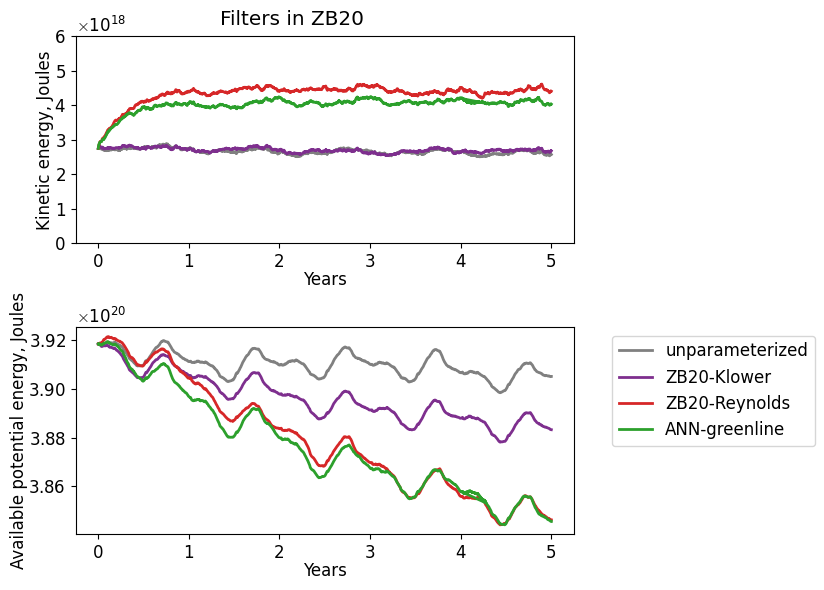

In [5]:
ds.plot_series(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline'])
plt.suptitle('Filters in ZB20')

CPU times: user 1.74 s, sys: 509 ms, total: 2.25 s
Wall time: 2.32 s


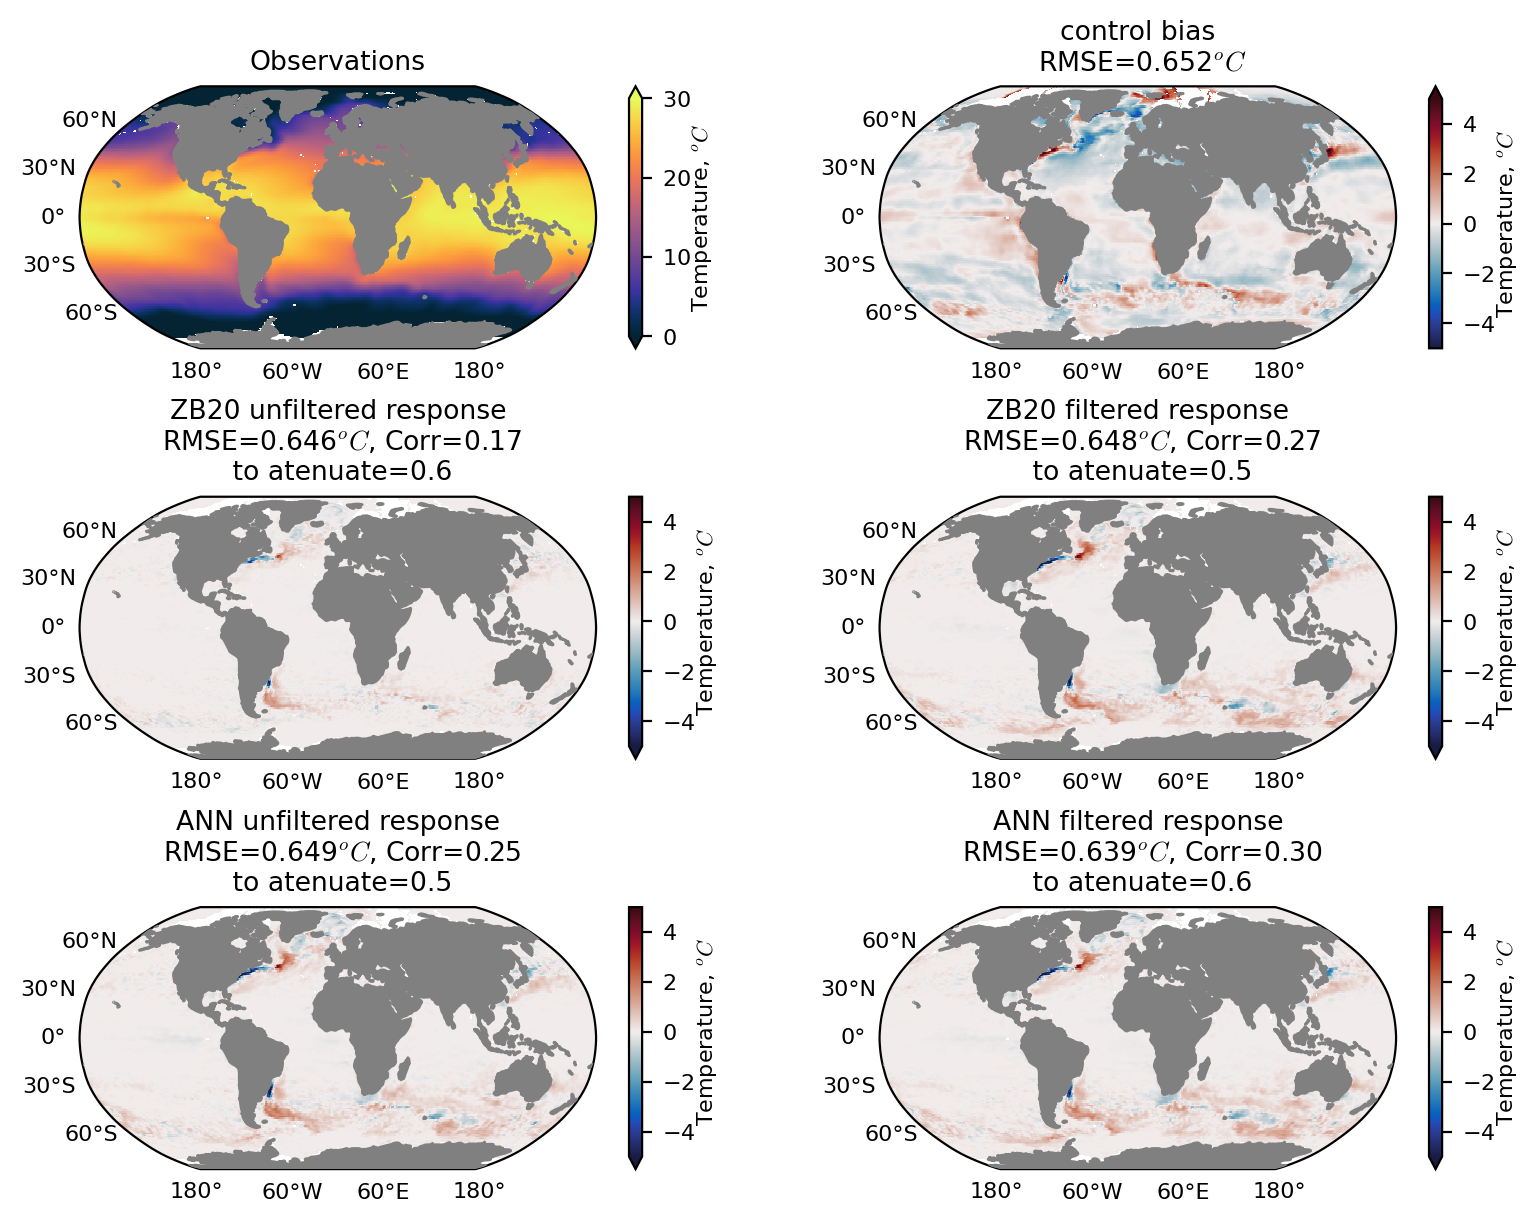

In [34]:
%time ds.plot_temp(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], zl=0, projection='3D', \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')

CPU times: user 46.8 s, sys: 15.4 s, total: 1min 2s
Wall time: 41.2 s


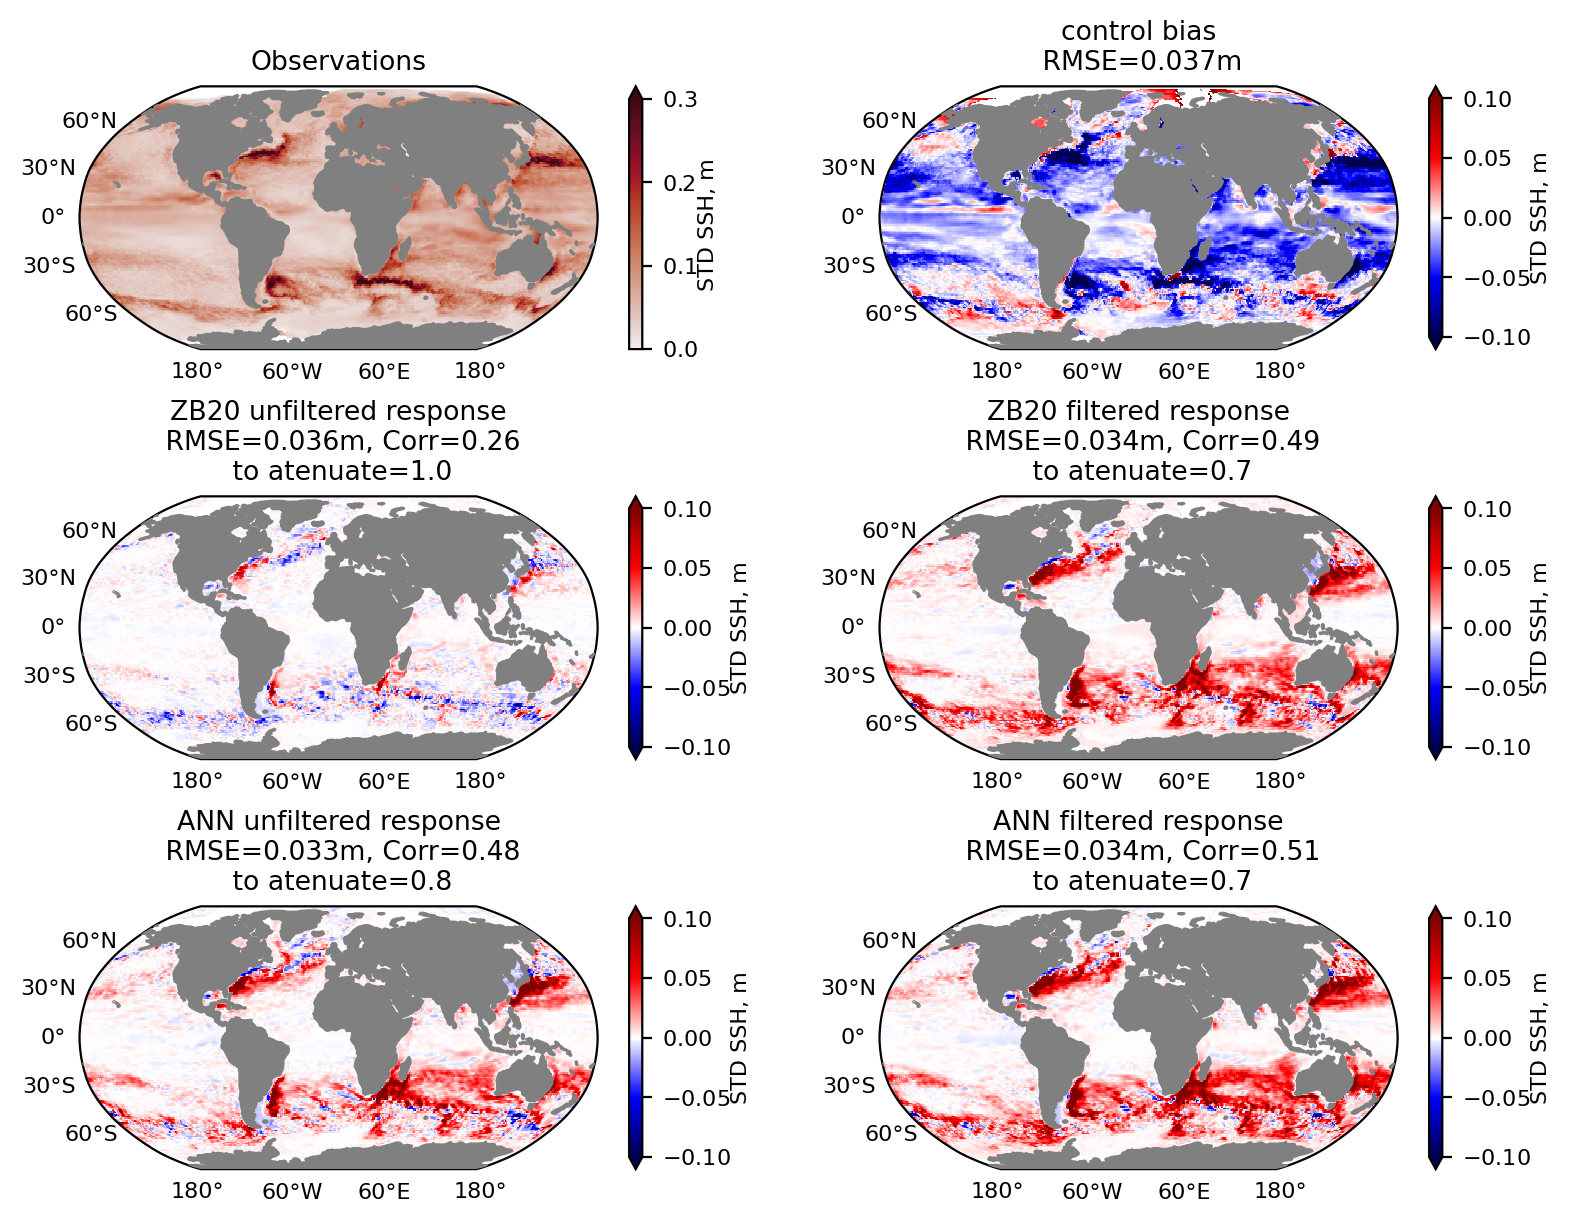

In [36]:
%time ds.plot_ssh_std(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], projection='3D', \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')

CPU times: user 1.65 s, sys: 342 ms, total: 1.99 s
Wall time: 1.9 s


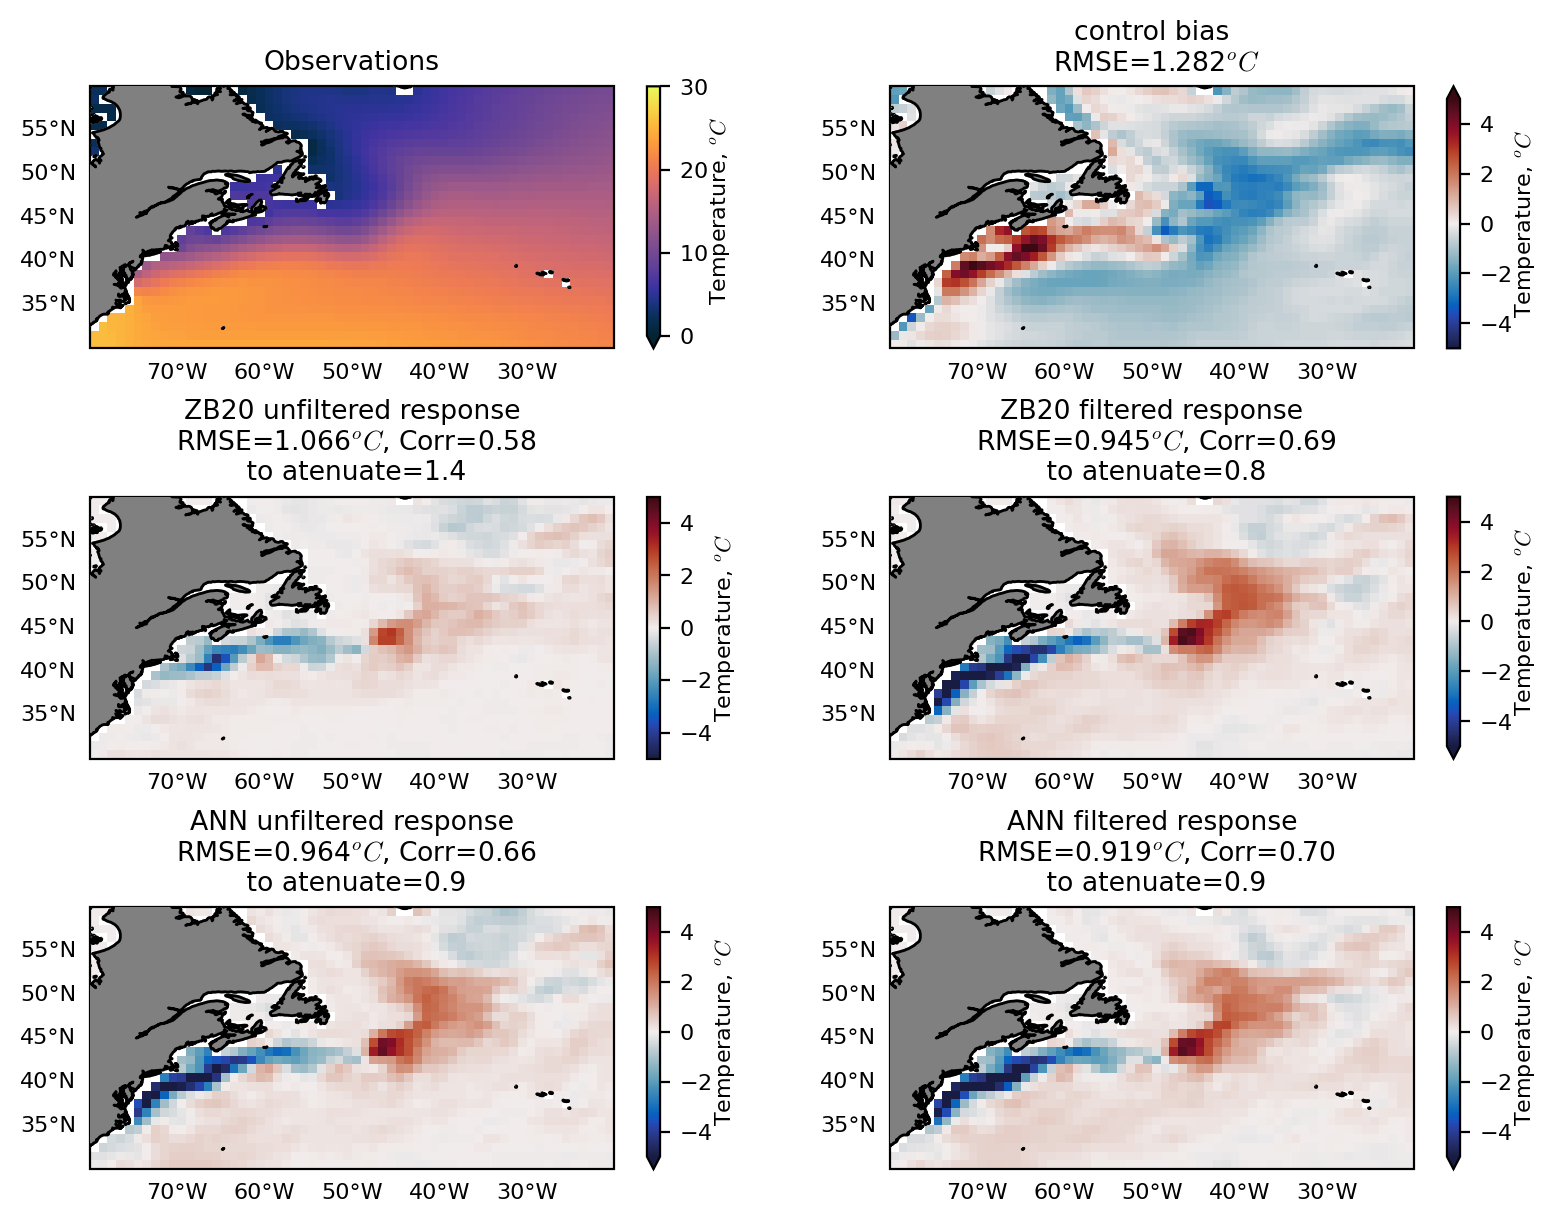

In [43]:
%time ds.plot_temp(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], \
                   select=select_Gulf, \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')

CPU times: user 2.78 s, sys: 719 ms, total: 3.5 s
Wall time: 2.93 s


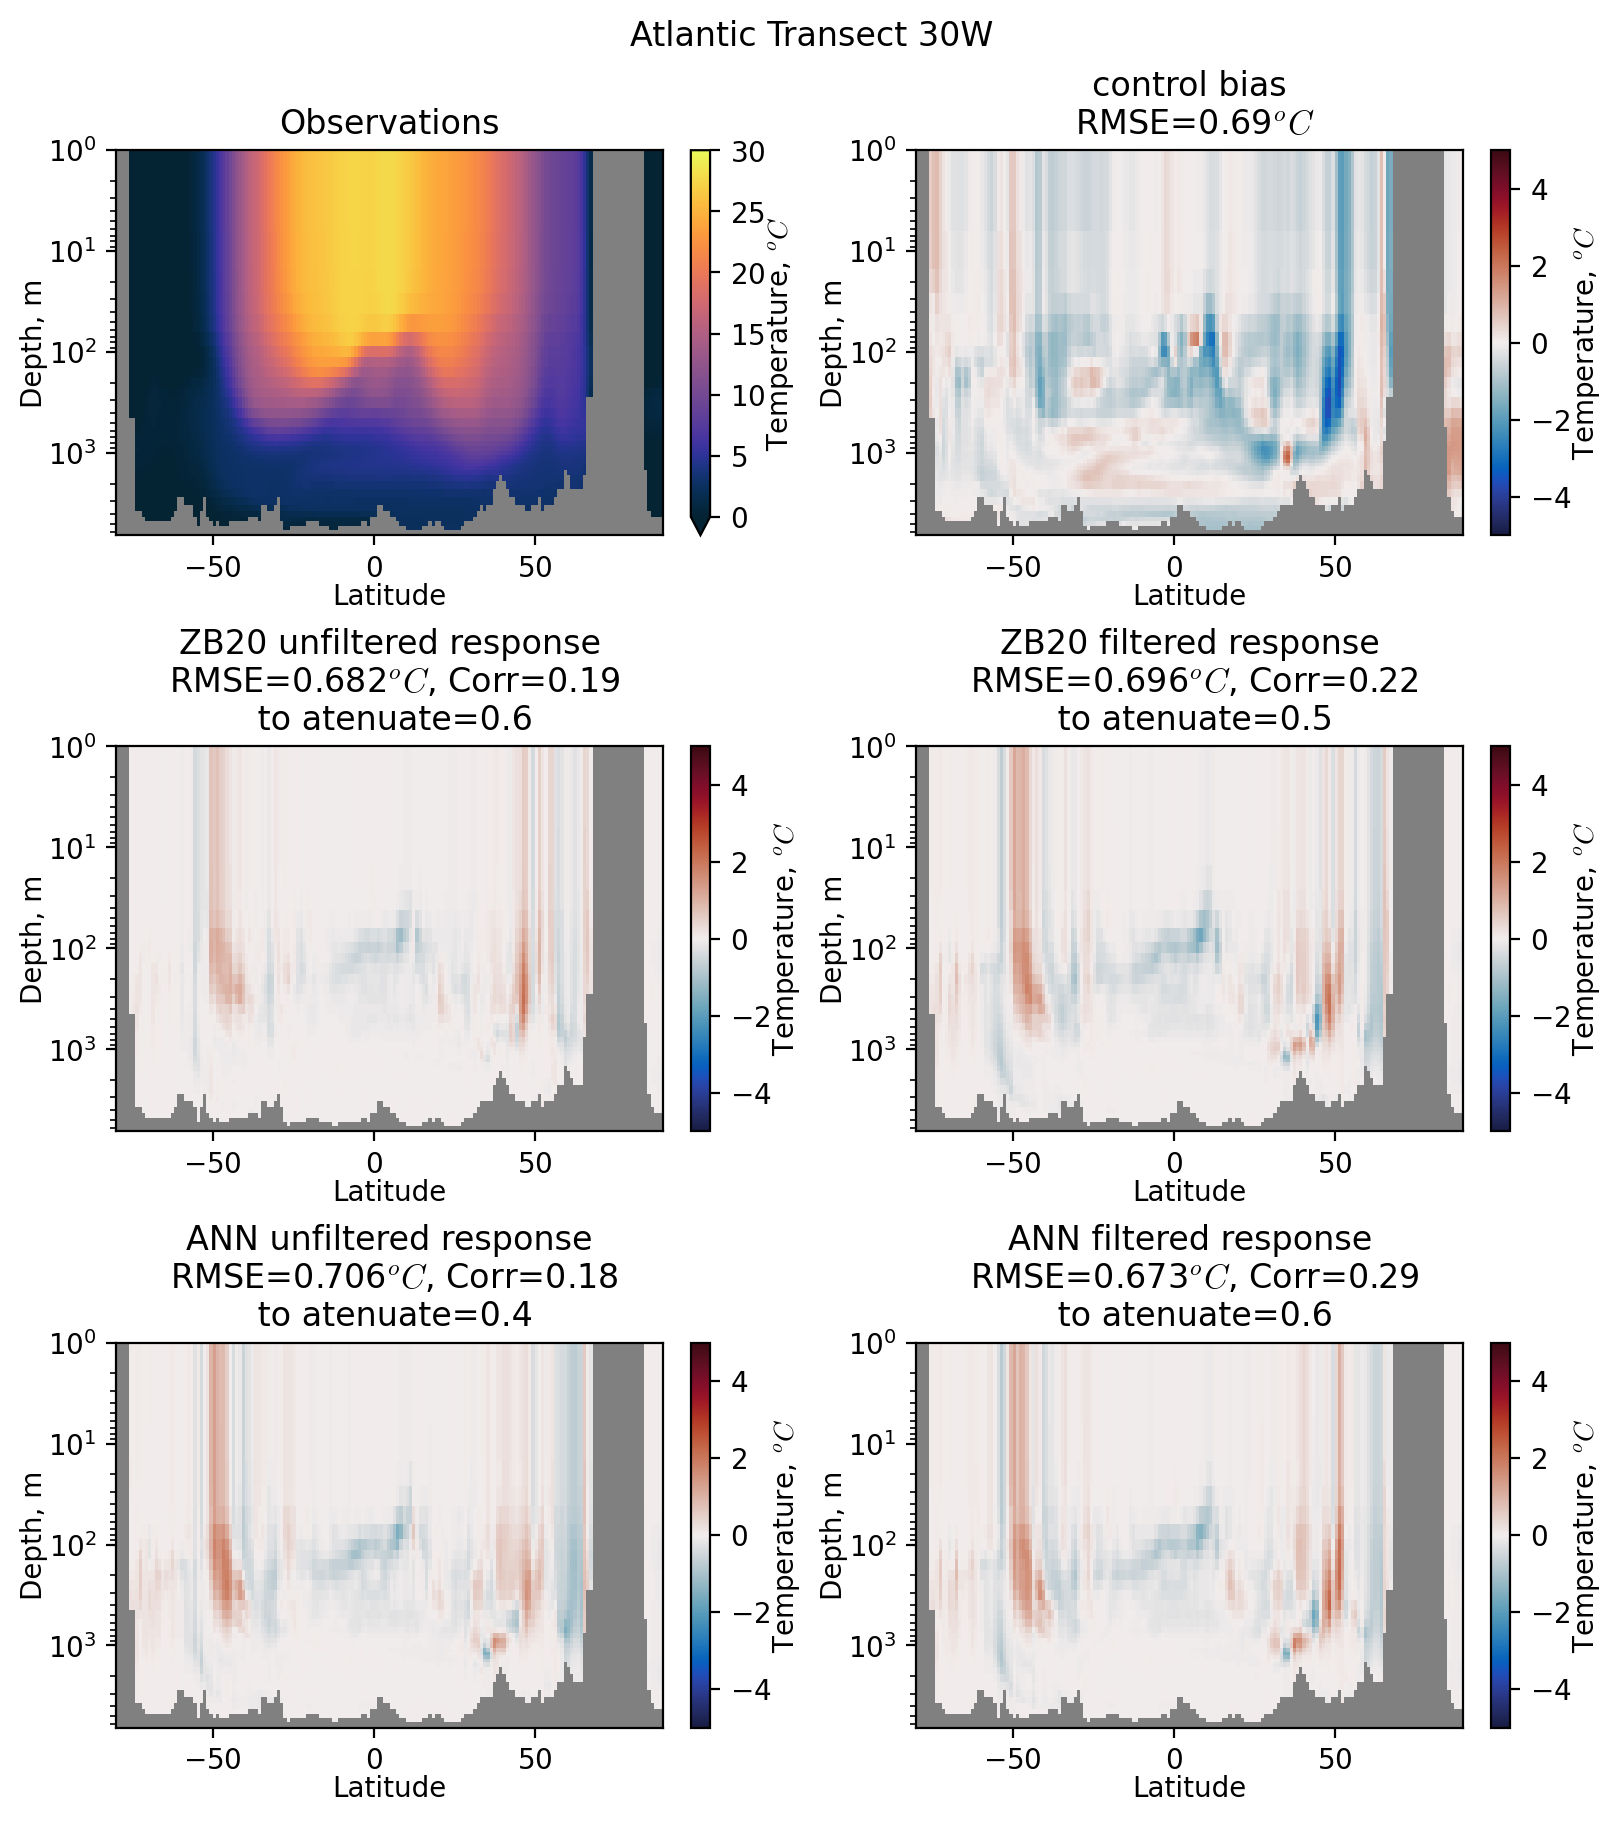

In [51]:
%time ds.plot_temp_section(['obs', 'unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline', 'ANN-redline'], \
                   select=select_Atlantic_transect, \
                   labels=['Observations', 'control', 'ZB20 unfiltered', 'ZB20 filtered', 'ANN unfiltered', 'ANN filtered'], \
                   plot_type='response')
plt.suptitle('Atlantic Transect 30W')
plt.savefig('bias-response-Atlantic.pdf')

CPU times: user 233 ms, sys: 8.88 ms, total: 242 ms
Wall time: 247 ms


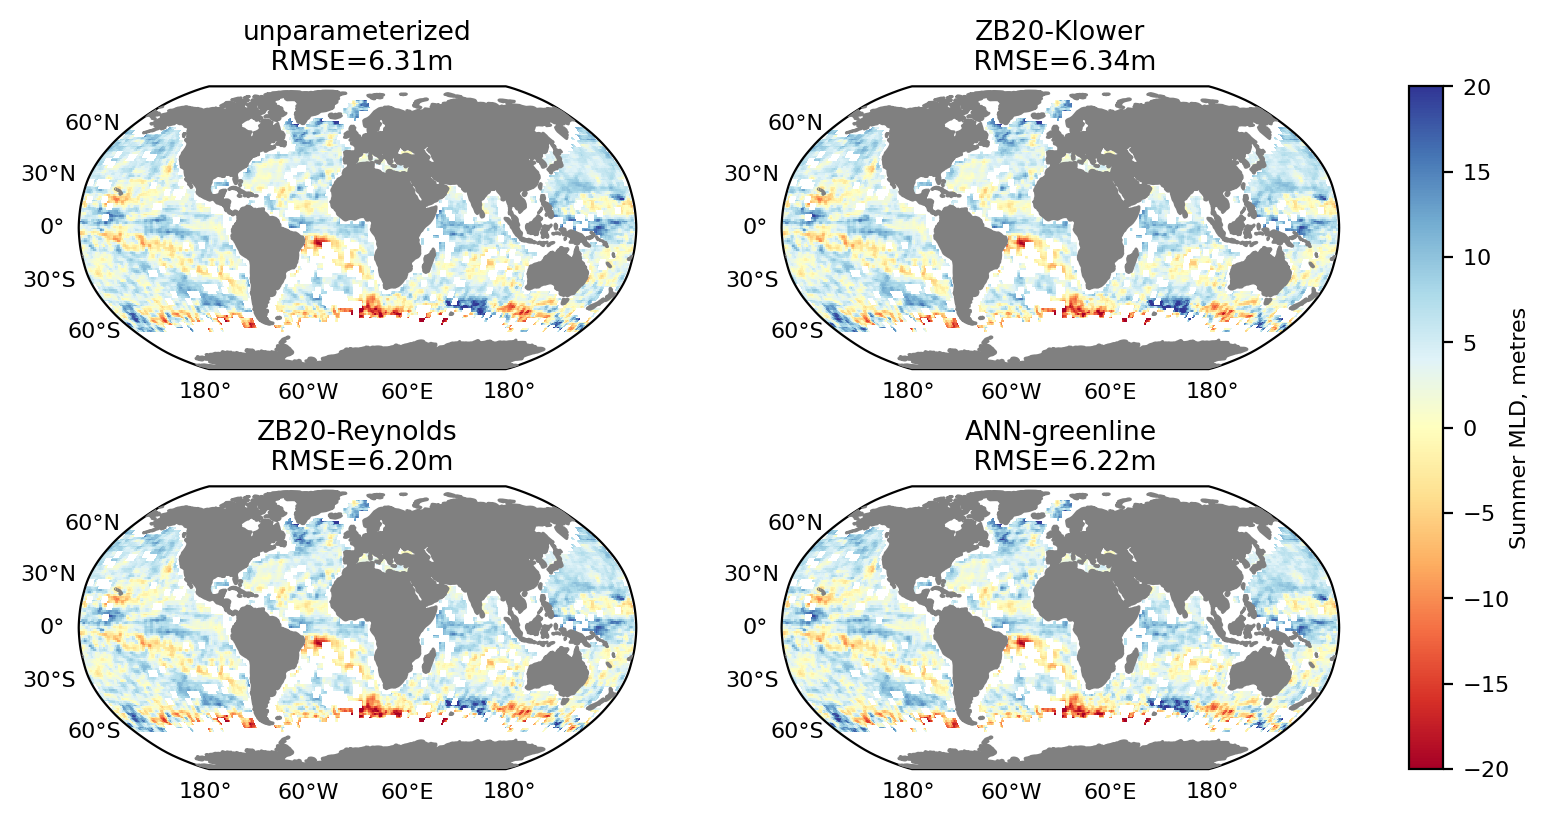

In [69]:
%time ds.plot_MLD_summer(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline'], select=select_globe, \
                   plot_type = 'bias', projection='3D')

CPU times: user 5.65 s, sys: 966 ms, total: 6.62 s
Wall time: 7.47 s


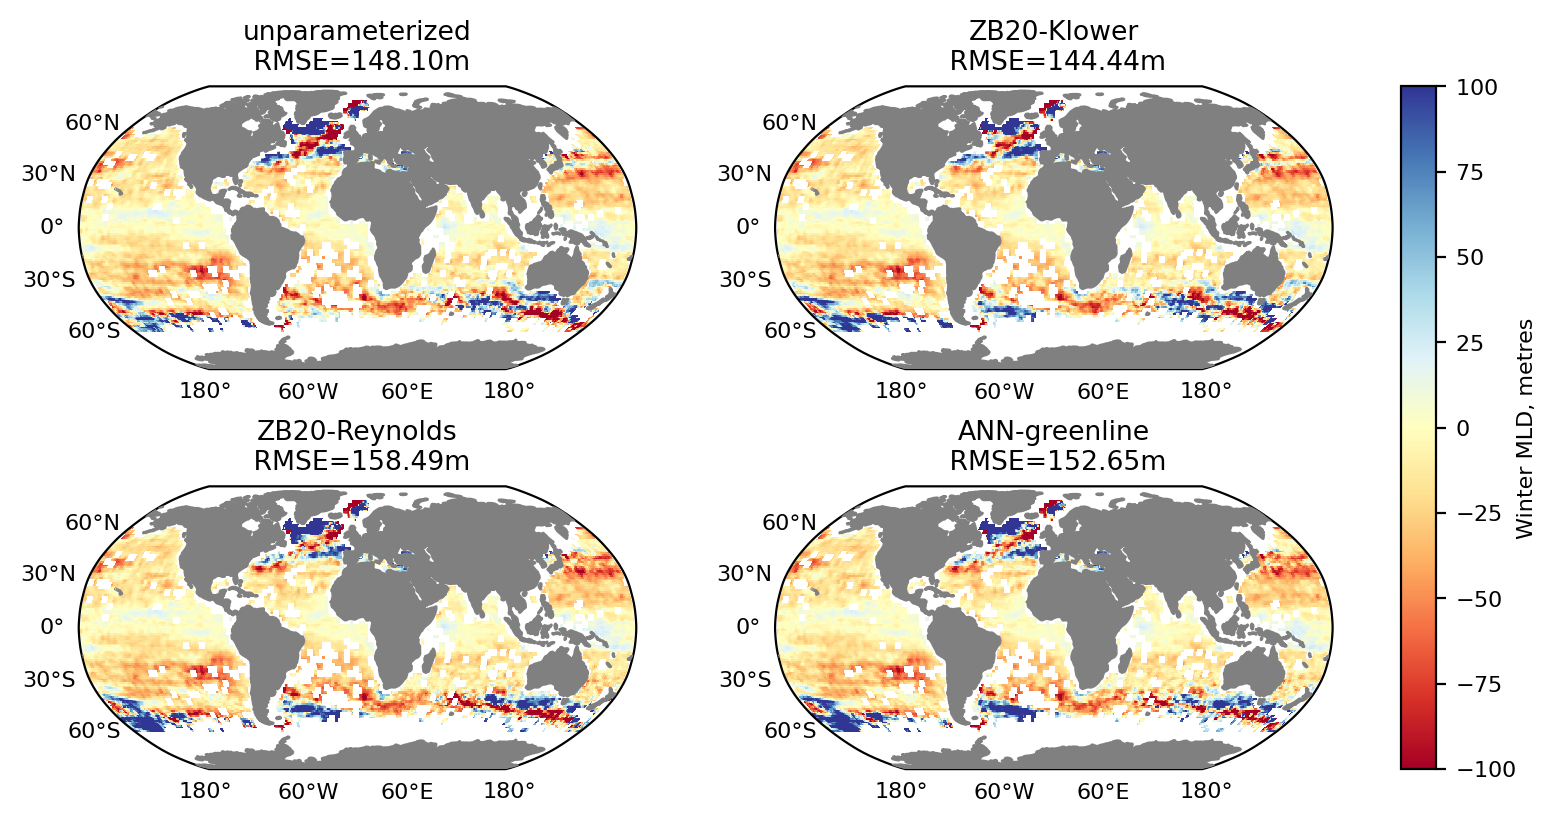

In [70]:
%time ds.plot_MLD_winter(['unparameterized', 'ZB20-Klower', 'ZB20-Reynolds', 'ANN-greenline'], select=select_globe, \
                   plot_type = 'bias', projection='3D')

Correlation: 0.8610406823840844
Relative Error: 0.586410795870881
R2 =  0.733146894962962
R2 max =  0.7433950779509934
Optinal scaling: 1.1327557640012447
Nans [test/control]: [43590, 40339]


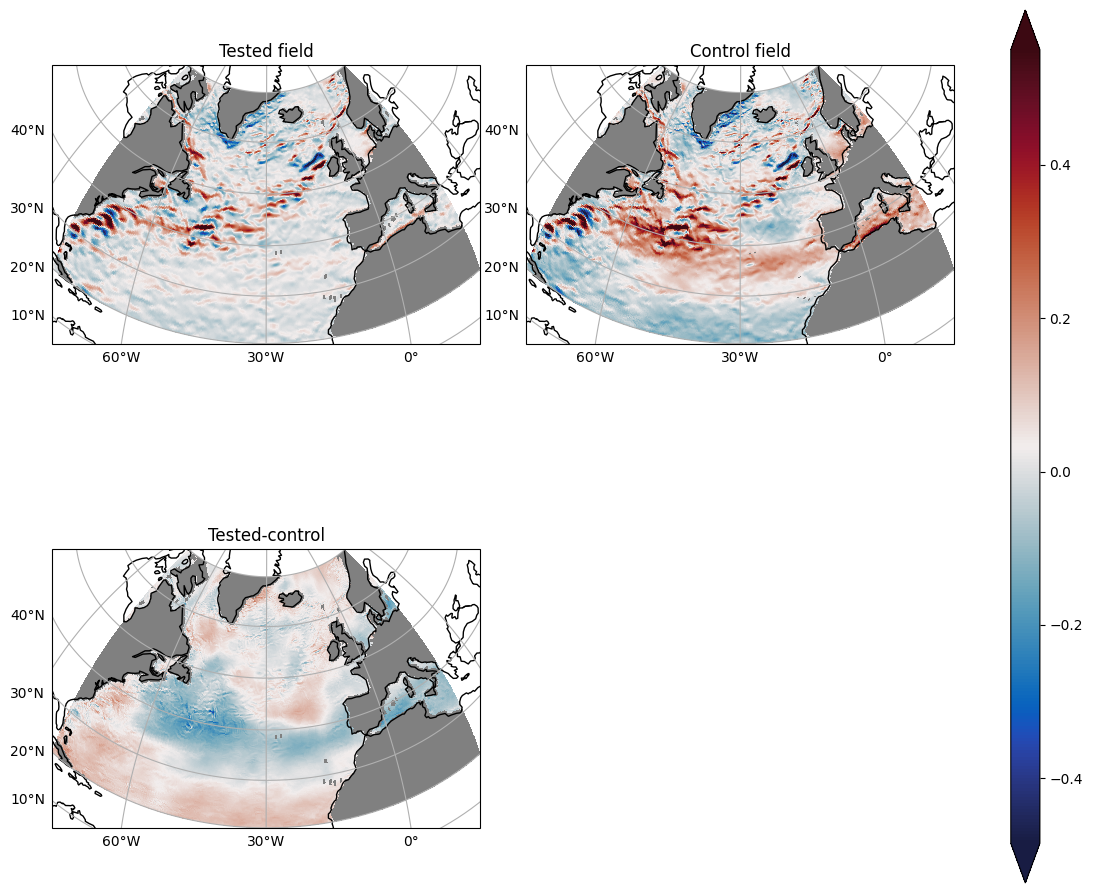

In [97]:
compare(ds['unparameterized'].geoU, ds['unparameterized'].ocean_daily.ssu, selector=select_NA_large)

Correlation: 0.7779230684789438
Relative Error: 0.7212293098723648
R2 =  0.5618397706600747
R2 max =  0.5690604138870234
Optinal scaling: 1.1263245695775244
Nans [test/control]: [43539, 40185]


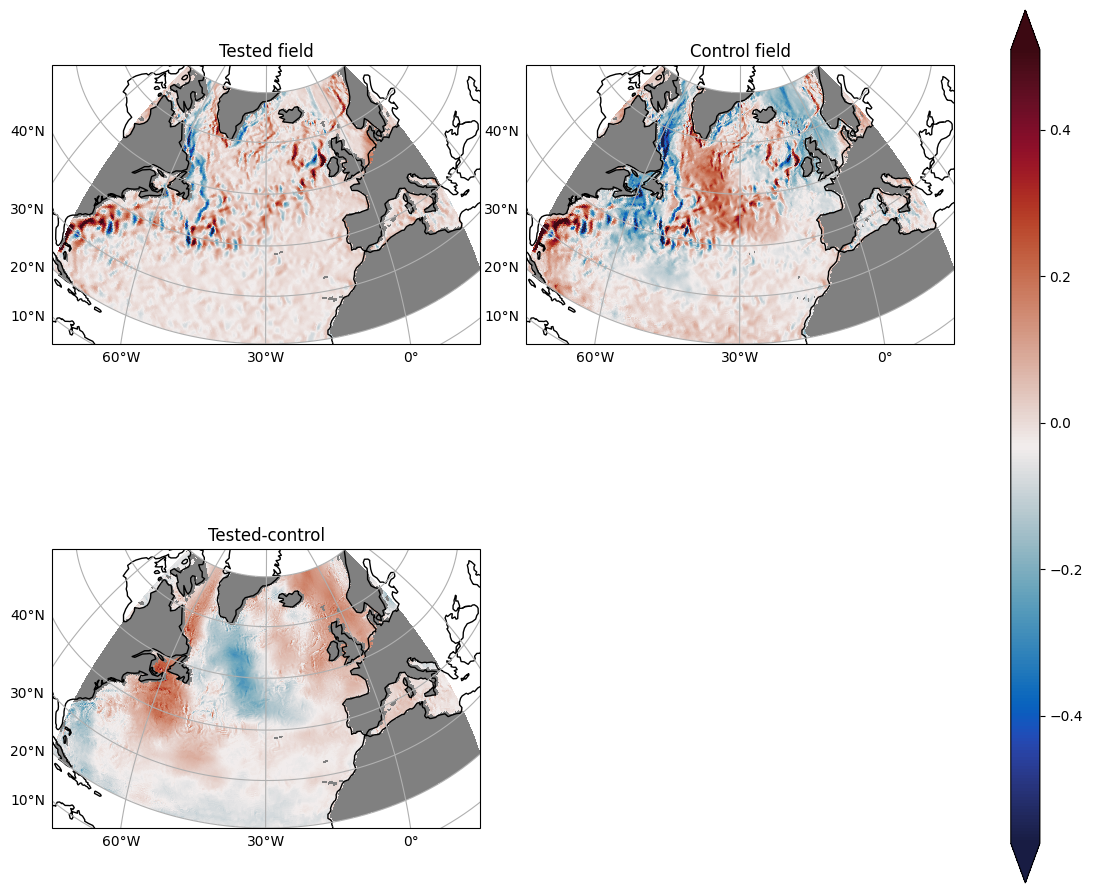

In [98]:
compare(ds['unparameterized'].geoV, ds['unparameterized'].ocean_daily.ssv, selector=select_NA_large)

Correlation: 0.36102482686596993
Relative Error: 1.1563392877578735
R2 =  -0.2913013696670532
R2 max =  0.13043427467346191
Optinal scaling: 0.35737982392311096
Nans [test/control]: [41367, 41367]


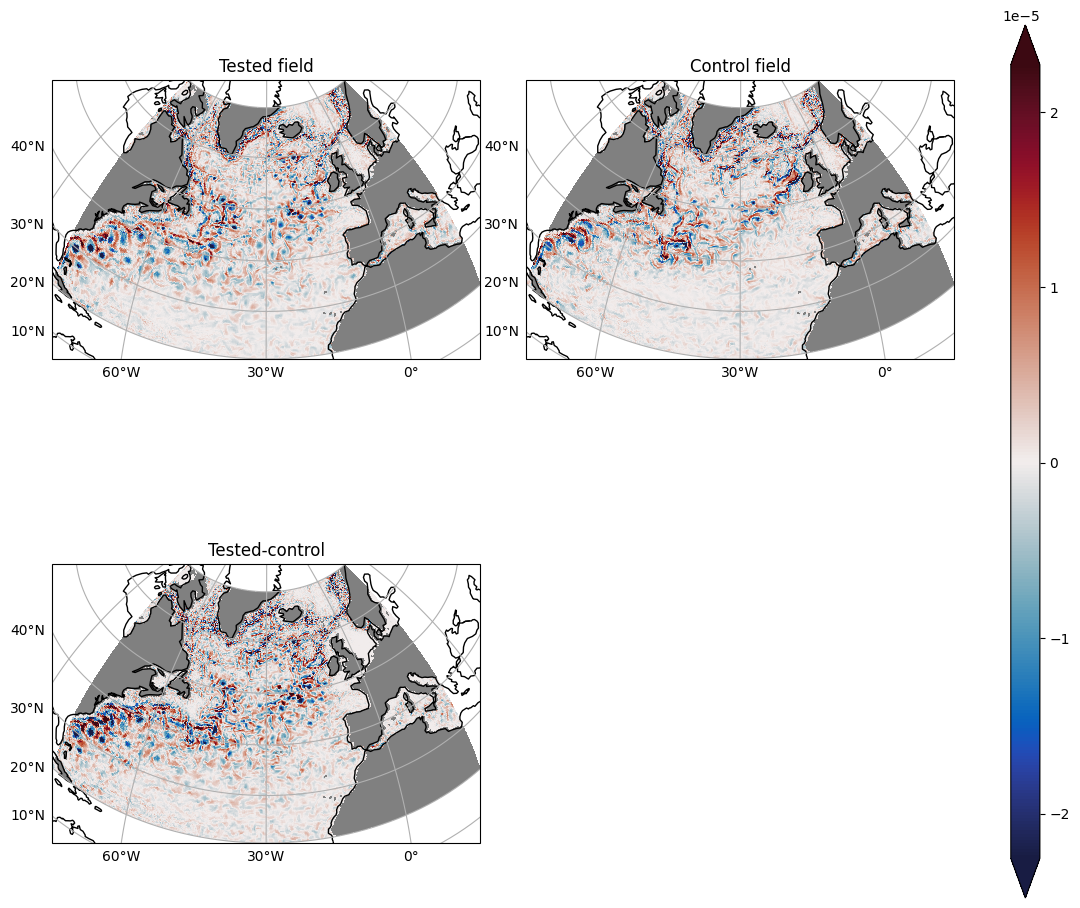

In [169]:
compare(ds['ANN-greenline'].RV, ds['unparameterized'].RV, selector=select_NA_large)